Падалко Богдан.
Задание №1 - Классификация методом гиперплоскостей для 2 классов.

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)
limit_to_2D = True

Я использовал датасет "Ирисы Фишера".

In [2]:
iris = datasets.load_iris()
X = iris.data 
target = iris.target 
names = iris.target_names
df_original = pd.DataFrame(X, columns=iris.feature_names)
df_original['species'] = iris.target
if limit_to_2D:
    df_original.drop(df_original.columns[np.random.randint(len(df_original.columns)-1)], axis = 1, inplace = True)
    df_original.drop(df_original.columns[np.random.randint(len(df_original.columns)-1)], axis = 1, inplace = True)
display(df_original)

,sepal width (cm),petal width (cm),species
0,3.5,0.2,0
1,3.0,0.2,0
2,3.2,0.2,0
3,3.1,0.2,0
4,3.6,0.2,0
...,...,...,...
145,3.0,2.3,2
146,2.5,1.9,2
147,3.0,2.0,2
148,3.4,2.3,2


В данном датасете 3 класса и, согласно информации с Kaggle, каждый класс по отношению к двум другим линейно разделим. В данной задаче мы ищем решающее правило для разделения на 2 класса, поэтому объединим 2 класса в 1. Для удобства будем кодировать классы числами -1 и 1.

In [3]:
df = df_original.copy()
df['species'].replace(to_replace = [0, 1, 2], value = [-1, 1, 1], inplace = True)
display(df)

,sepal width (cm),petal width (cm),species
0,3.5,0.2,-1
1,3.0,0.2,-1
2,3.2,0.2,-1
3,3.1,0.2,-1
4,3.6,0.2,-1
...,...,...,...
145,3.0,2.3,1
146,2.5,1.9,1
147,3.0,2.0,1
148,3.4,2.3,1


Выделим из полученного датасета набор признаков и набор результирующих классов.

In [4]:
x = df.drop('species', axis = 1).values.astype(float) #Массив размерности 4*150.
y = df['species'].values #Массив размерности 150*1.

Напишем функции для классификации методом гиперплоскостей:

In [5]:
def SVM_Classification(X, Y, step = 0.01, epochs_amount = 100, lambda_par = 0.01):
    l = np.zeros(X.shape[1]) #Инициализация весов нулями.
    b = 0
    for i in range(epochs_amount):
        for j, X_j in enumerate(X):
            #Подсчёт градиентов dl, db.
            if Y[j]*(np.dot(X_j, l)-b) >= 1:
                dl = 2*lambda_par*l
                db = 0
            else:
                dl = 2*lambda_par*l-np.dot(X_j, Y[j])
                db = Y[j]
            l = l-step*dl
            b = b-step*db
    return l, b
def SVM_Predict(X, l, b):
    return np.sign(np.dot(X, l)-b)

Разделим элементы датасета на обучающую и тренировочную выборки.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 2, shuffle = True)

Вызовем функцию классификации для генерации решающего правила для классов 0 и объединения классов 1 и 2.

In [7]:
w0_12, b0_12 = SVM_Classification(x_train, y_train, 0.001, 1000, 0.01)
print("Вектор нормали:")
print(w0_12)
print("Свободный член:")
print(b0_12)
y_predict = SVM_Predict(x_test, w0_12, b0_12)
print("Точность: "+str(int(accuracy_score(y_test, y_predict)*100))+"%.")

Вектор нормали:
[-0.71829981  1.93070773]
Свободный член:
-0.6990000000000005
Точность: 100%.


Для наглядности рассмотрим двумерный случай - используем только 2 признака из 4.

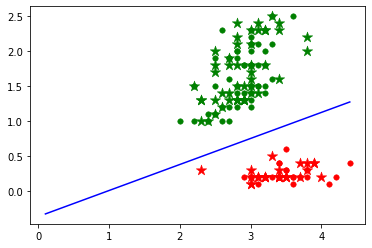

In [8]:
fig = plt.figure()
for i in range(x_train.shape[0]):
    if y_train[i] == -1:
        plt.scatter(x_train[i][0], x_train[i][1], s = 120, marker = '.', linewidths = 0.5, color = 'red')
    else:
        plt.scatter(x_train[i][0], x_train[i][1], s = 120, marker = '.', linewidths = 0.5, color = 'green')
for i in range(x_test.shape[0]):
    if y_predict[i] == -1:
        if y_predict[i] != y_test[i]:
            plt.scatter(x_test[i][0], x_test[i][1], s = 120, marker = '*', linewidths = 0.5, color = 'darkred') #Ошибочное распознание как класс 0.
        else:
            plt.scatter(x_test[i][0], x_test[i][1], s = 120, marker = '*', linewidths = 0.5, color = 'red') #Правильное распознание как класс 0.
    else:
        if y_predict[i] != y_test[i]:
            plt.scatter(x_test[i][0], x_test[i][1], s = 120, marker = '*', linewidths = 0.5, color = 'darkgreen') #Ошибочное распознание как класс 1 или 2.
        else:
            plt.scatter(x_test[i][0], x_test[i][1], s = 120, marker = '*', linewidths = 0.5, color = 'green') #Правильное распознание как класс 1 или 2.
if limit_to_2D:
    y_func = lambda x, l, b: (-1.0*l[0]*x+b)/l[1]
    x_min = np.amin(x)
    x_max = np.amax(x)
    plt.plot([x_min, x_max], [y_func(x_min, w0_12, b0_12), y_func(x_max, w0_12, b0_12)], color = 'blue')

На данном графике элементы класса "-1" показаны красным цветом, а класса "1" - зелёным цветом. Кружками обозначены элементы из обучающей выборки, а звёздочками - элементы из тренировочной выборки. Элементы, распознанные неверно, показываются более тёмным цветом.

Задание №2 - Модификация классификации методом гиперплоскостей для 3 классов.

В данный момент один из классов представляет собой объединение двух классов. Для построения полной классификации ирисов Фишера разъединим эти 2 класса (а если точнее - удалим из исходного датасета данные об одном классе) и построим решающее правило методом гиперплоскостей только для них. Классы закодируем числами -1 и 1 как и в предыдущем задании.

In [9]:
df = df_original.copy()
df.drop(df.loc[df['species'] == 0].index, inplace=True)
df['species'].replace(to_replace = [1, 2], value = [-1, 1], inplace = True)
display(df)

,sepal width (cm),petal width (cm),species
50,3.2,1.4,-1
51,3.2,1.5,-1
52,3.1,1.5,-1
53,2.3,1.3,-1
54,2.8,1.5,-1
...,...,...,...
145,3.0,2.3,1
146,2.5,1.9,1
147,3.0,2.0,1
148,3.4,2.3,1


Выделим из полученного датасета набор признаков и набор результирующих классов.

In [10]:
x = df.drop('species', axis = 1).values.astype(float) #Массив размерности 4*100.
y = df['species'].values #Массив размерности 1*100.

Разделим элементы датасета на обучающую и тренировочную выборки.

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 2, shuffle = True)

Вызовем функцию классификации для генерации решающего правила для классов 1 и 2.

In [12]:
w1_2, b1_2 = SVM_Classification(x_train, y_train, 0.001, 1000, 0.01)
print("Вектор нормали:")
print(w1_2)
print("Свободный член:")
print(b1_2)
y_predict = SVM_Predict(x_test, w1_2, b1_2)
print("Точность: "+str(int(accuracy_score(y_test, y_predict)*100))+"%.")

Вектор нормали:
[-1.02662006  2.88604484]
Свободный член:
1.8159999999999108
Точность: 90%.


Для наглядности рассмотрим двумерный случай - используем только 2 признака из 4.

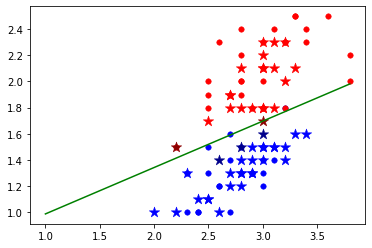

In [13]:
fig = plt.figure()
for i in range(x_train.shape[0]):
    if y_train[i] == -1:
        plt.scatter(x_train[i][0], x_train[i][1], s = 120, marker = '.', linewidths = 0.5, color = 'blue')
    else:
        plt.scatter(x_train[i][0], x_train[i][1], s = 120, marker = '.', linewidths = 0.5, color = 'red')
for i in range(x_test.shape[0]):
    if y_predict[i] == -1:
        if y_predict[i] != y_test[i]:
            plt.scatter(x_test[i][0], x_test[i][1], s = 120, marker = '*', linewidths = 0.5, color = 'darkblue') #Ошибочное распознание как класс 1.
        else:
            plt.scatter(x_test[i][0], x_test[i][1], s = 120, marker = '*', linewidths = 0.5, color = 'blue') #Правильное распознание как класс 1.
    else:
        if y_predict[i] != y_test[i]:
            plt.scatter(x_test[i][0], x_test[i][1], s = 120, marker = '*', linewidths = 0.5, color = 'darkred') #Ошибочное распознание как класс 2.
        else:
            plt.scatter(x_test[i][0], x_test[i][1], s = 120, marker = '*', linewidths = 0.5, color = 'red') #Правильное распознание как класс 2.
if limit_to_2D:
    y_func = lambda x, l, b: (-1.0*l[0]*x+b)/l[1]
    x_min = np.amin(x)
    x_max = np.amax(x)
    plt.plot([x_min, x_max], [y_func(x_min, w1_2, b1_2), y_func(x_max, w1_2, b1_2)], color = 'green')

Используя оба найденных решающих правила, применим их ко всему датасету.

In [14]:
df = df_original.copy()

In [15]:
x = df.drop('species', axis = 1).values.astype(float) #Массив размерности 4*150.
y = df['species'].values #Массив размерности 1*150.

Для наглядности рассмотрим двумерный случай - используем только 2 признака из 4.

Итоговая точность разделения: 95%.


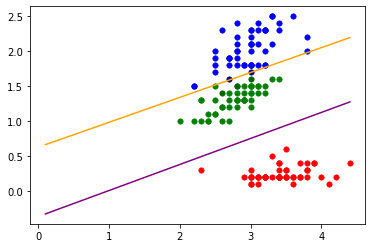

In [16]:
y_predict_first = SVM_Predict(x, w0_12, b0_12)
y_predict_second = SVM_Predict(x, w1_2, b1_2)
fig = plt.figure()
for i in range(x.shape[0]):
    if y_predict_first[i] == -1:
        if y[i] != 0:
            plt.scatter(x[i][0], x[i][1], s = 120, marker = '.', linewidths = 0.5, color = 'darkred') #Ошибочное распознание как класс 0.
        else:
            plt.scatter(x[i][0], x[i][1], s = 120, marker = '.', linewidths = 0.5, color = 'red') #Правильное распознание как класс 0.
    else:
        if y_predict_second[i] == -1:
            if y[i] != 1:
                plt.scatter(x[i][0], x[i][1], s = 120, marker = '.', linewidths = 0.5, color = 'darkgreen') #Ошибочное распознание как класс 1.
            else:
                plt.scatter(x[i][0], x[i][1], s = 120, marker = '.', linewidths = 0.5, color = 'green') #Правильное распознание как класс 1.
        else:
            if y[i] != 2:
                plt.scatter(x[i][0], x[i][1], s = 120, marker = '.', linewidths = 0.5, color = 'darkblue') #Ошибочное распознание как класс 2.
            else:
                plt.scatter(x[i][0], x[i][1], s = 120, marker = '.', linewidths = 0.5, color = 'blue') #Правильное распознание как класс 2.
if limit_to_2D:
    y_func = lambda x, l, b: (-1.0*l[0]*x+b)/l[1]
    x_min = np.amin(x)
    x_max = np.amax(x)
    plt.plot([x_min, x_max], [y_func(x_min, w0_12, b0_12), y_func(x_max, w0_12, b0_12)], color = 'purple')
    plt.plot([x_min, x_max], [y_func(x_min, w1_2, b1_2), y_func(x_max, w1_2, b1_2)], color = 'orange')
y_predict_first[y_predict_first == -1] = 0
y_predict_second[y_predict_second == 1] = 2
y_predict_second[y_predict_second == -1] = 1
y_predict_final = np.multiply(y_predict_first, y_predict_second)
print("Итоговая точность разделения: "+str(int(accuracy_score(y, y_predict_final)*100))+"%.")